# Arxiv Dataset Clustering
This notebook aims to cluster scholarly articles from the Arxiv dataset.

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Preview Data

In [2]:
input_file = '../data/data_preprocessed.csv'
df = pd.read_csv(input_file)
df.head()

,categories,update_date,text
0,hep-ph,2008-11-26,calculation prompt diphoton production cross s...
1,math.CO cs.CG,2008-12-13,sparsity certifying graph decomposition descri...
2,physics.gen-ph,2008-01-13,evolution earth moon system dark matter field ...
3,math.CO,2007-05-23,determinant stirling cycle number count unlabe...
4,math.CA math.FA,2013-10-15,dyadic lambda alpha lambda alpha compute lambd...


## Text Vectorization

In [3]:
def vectorize_text(df):
    # Replace NaN values in the 'text' column with empty strings
    df['text'] = df['text'].fillna('')
    # Instantiate TfidfVectorizer
    vectorizer = TfidfVectorizer(max_features=1000)
    X = vectorizer.fit_transform(df['text'])
    return X, vectorizer

tfidf_matrix, vectorizer = vectorize_text(df)

## Dimensionality Reduction

In [4]:
def reduce_dimensionality(X):
    svd = TruncatedSVD(n_components=50, random_state=42)
    X_reduced = svd.fit_transform(X)
    return X_reduced

X_reduced = reduce_dimensionality(tfidf_matrix)

## Visual Inspection using t-SNE

C:\Users\moham\AppData\Local\Temp\ipykernel_13724\2114200475.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], marker='.' , alpha=0.7, c=X_tsne[:, 1], cmap=plt.cm.get_cmap('jet', 10), s=10)


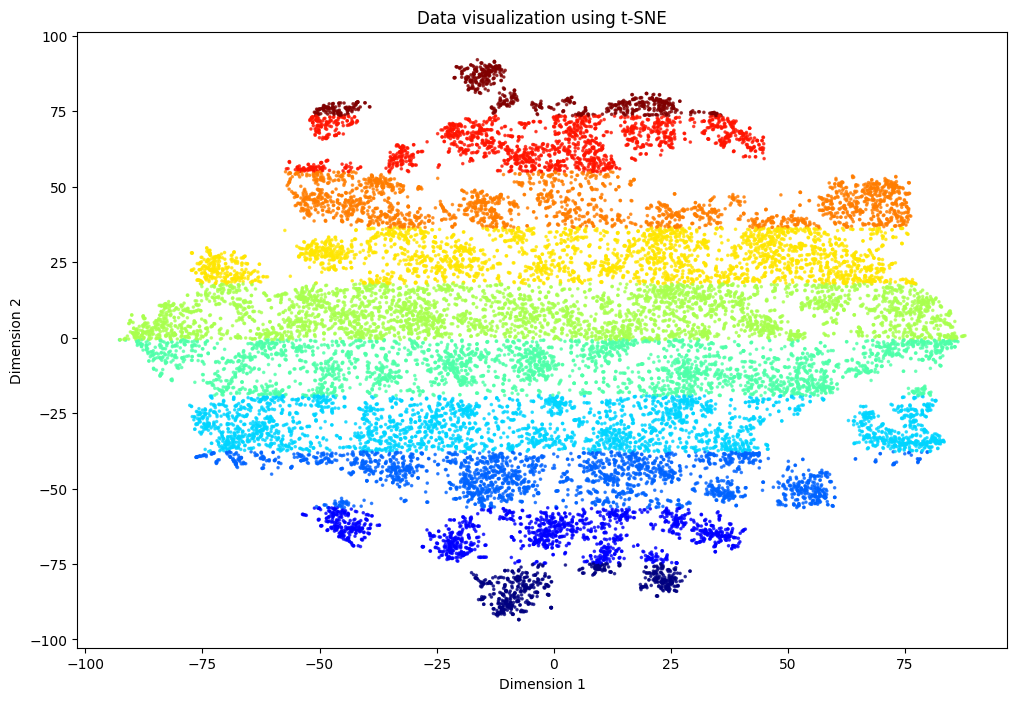

In [7]:
def visualize_tsne(X):
    # Taking a random sample of 1% of the data
    sample_indices = np.random.choice(X.shape[0], int(0.01 * X.shape[0]), replace=False)
    X_sample = X[sample_indices]

    # Instantiating and fitting t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_sample)

    # Plotting the t-SNE features in a scatter plot and coloring them according to their cluster
    plt.figure(figsize=(12, 8))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], marker='.' , alpha=0.7, c=X_tsne[:, 1], cmap=plt.cm.get_cmap('jet', 10), s=10)
    plt.title('Data visualization using t-SNE')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()


visualize_tsne(X_reduced)

## Determine Optimal Clusters

In [1]:
def determine_optimal_clusters(X):
    wcss = []
    silhouette_scores = []
    davies_bouldin_scores = []

    # Taking a random sample of 1% of the data
    sample_indices = np.random.choice(X.shape[0], int(0.05 * X.shape[0]), replace=False)
    X_sample = X[sample_indices]

    # Define a range of clusters to test
    cluster_range = range(2, 11)

    for i in cluster_range:
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
        kmeans.fit(X_sample)
        wcss.append(kmeans.inertia_)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(X_sample, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)


        # Calculate Davies-Bouldin index
        davies_bouldin_avg = davies_bouldin_score(X_sample, kmeans.labels_)
        davies_bouldin_scores.append(davies_bouldin_avg)

        # Print the score for each cluster
        print("For n_clusters = {}, silhouette score is {})".format(i, silhouette_avg))
        print("For n_clusters = {}, Davies-Bouldin score is {})".format(i, davies_bouldin_avg))



    # Plot the scores 
    plt.figure(figsize=(15, 5))

    # Plot Silhouette Score
    plt.subplot(1, 2, 1)
    plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='g')
    plt.title('Silhouette Score')
    plt.xlabel('Number of clusters')
    plt.ylabel('Score')

    # Plot Davies-Bouldin Score
    plt.subplot(1, 2, 2)
    plt.plot(cluster_range, davies_bouldin_scores, marker='o', linestyle='-', color='r')
    plt.title('Davies-Bouldin Score')
    plt.xlabel('Number of clusters')
    plt.ylabel('Score')

    plt.tight_layout()
    plt.show()

# Call the function to determine optimal clusters
determine_optimal_clusters(X_reduced)

NameError: name 'X_reduced' is not defined

## Apply Clustering

In [17]:
def apply_clustering(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    clusters = kmeans.fit_predict(X)
    return clusters

optimal_clusters = 12  # Adjusted based on observation.
df['cluster'] = apply_clustering(X_reduced, optimal_clusters)

## Visualizing Clusters

In [ ]:
def plot_clusters(df):
    plt.figure(figsize=(10,6))
    sns.countplot(x='cluster', data=df)
    plt.title('Distribution of Clusters')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Samples')
    plt.show()

plot_clusters(df)

def visualize_clusters(X, clusters):
    # Taking a random sample of 1% of the data
    sample_indices = np.random.choice(X.shape[0], int(0.01 * X.shape[0]), replace=False)
    X_sample = X[sample_indices]
    clusters_sample = clusters[sample_indices]

    # Instantiating and fitting t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_sample)

    # Plotting the t-SNE features
    plt.figure(figsize=(12, 8))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], marker='.', c=clusters_sample, cmap='viridis')
    plt.title('Data visualization using t-SNE')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

    # plotting in 3D

    # Instantiating and fitting t-SNE
    tsne = TSNE(n_components=3, random_state=42)
    X_tsne = tsne.fit_transform(X_sample)

    # Plotting the t-SNE features
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], marker='.', c=clusters_sample, cmap='viridis')
    plt.title('Data visualization using t-SNE')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()


visualize_clusters(X_reduced, df['cluster'])

## Save Results

In [18]:
output_file = '../data/data_clustered.csv'
df.to_csv(output_file, index=False)
